In [6]:
%matplotlib inline

In [49]:
import os
home_folder = os.path.expanduser("~")
print(home_folder)

/root


In [50]:
# Change this to the location of your dataset
data_folder = os.path.join(home_folder, "Data", "Ionosphere")
data_filename = os.path.join(data_folder, "ionosphere.data")
print(data_filename)

/root/Data/Ionosphere/ionosphere.data


In [56]:
import csv
import numpy as np

# Size taken from the dataset and is known
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [58]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()

In [59]:
estimator.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [62]:
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.3%


In [63]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [24]:
plt.plot?

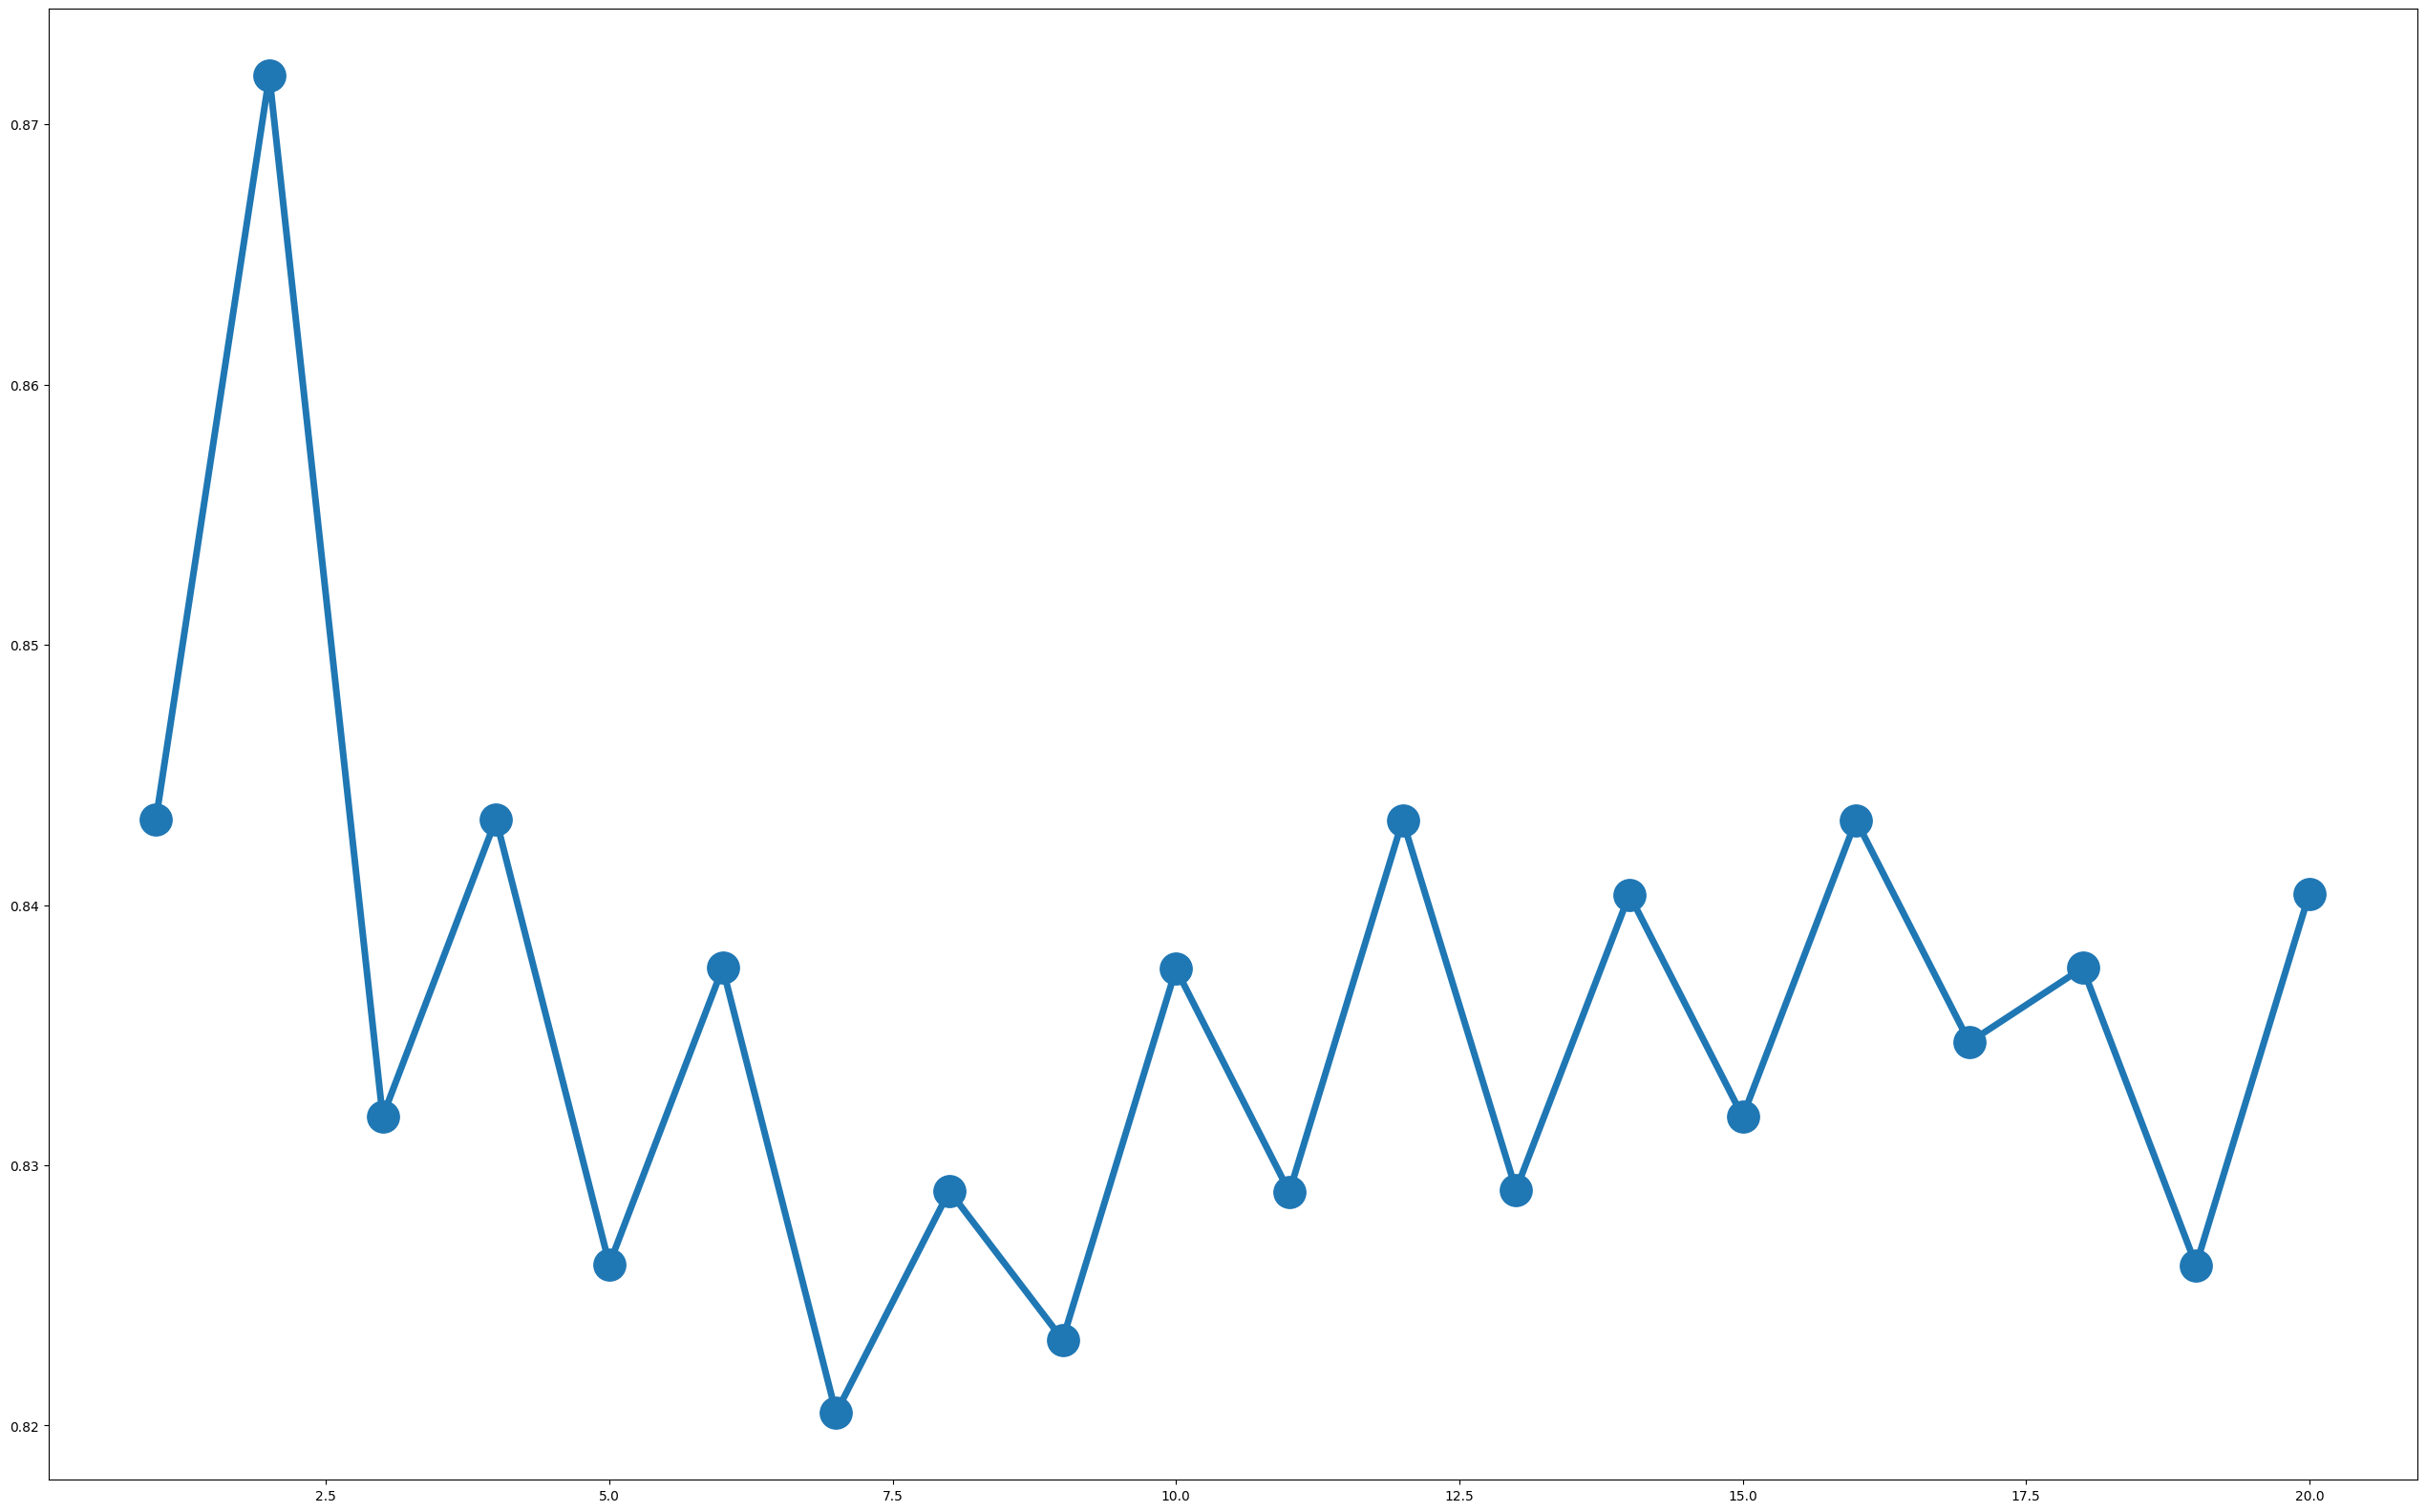

In [65]:
from matplotlib import pyplot as plt
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
#plt.axis([0, max(parameter_values), 0, 1.0])

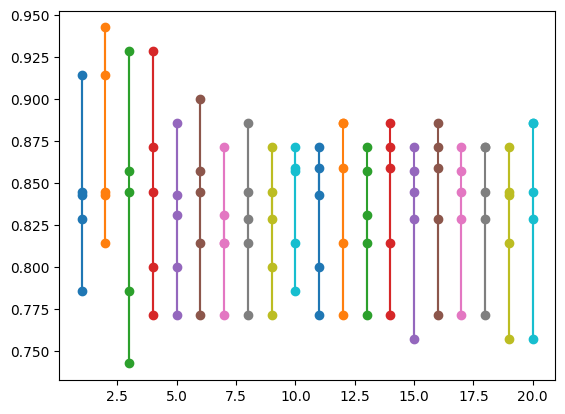

In [66]:

for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

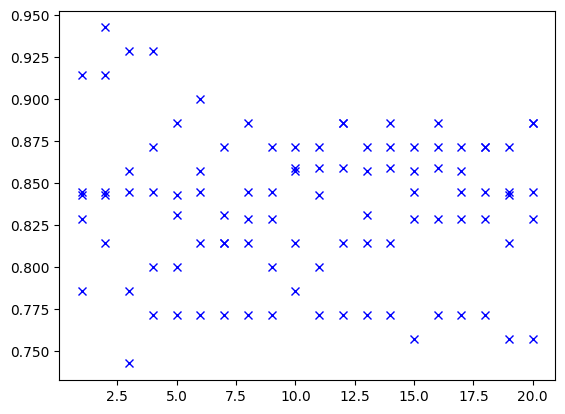

In [67]:
plt.plot(parameter_values, all_scores, 'bx')

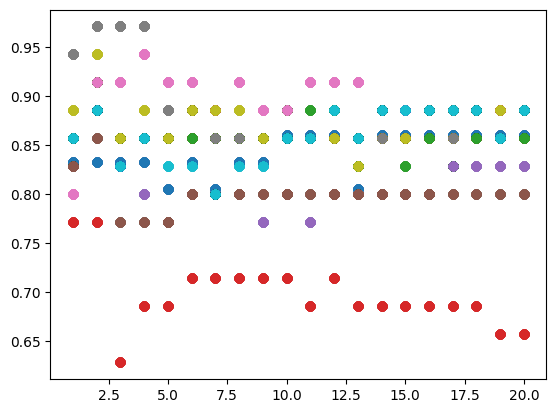

In [70]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  # Including 20
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

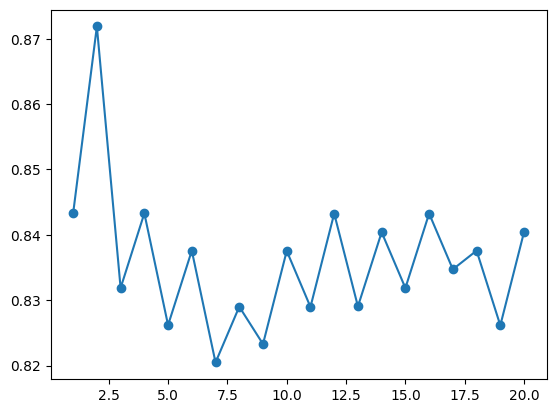

In [68]:
plt.plot(parameter_values, avg_scores, '-o')

In [72]:
from sklearn.preprocessing import MinMaxScaler